In [243]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import random


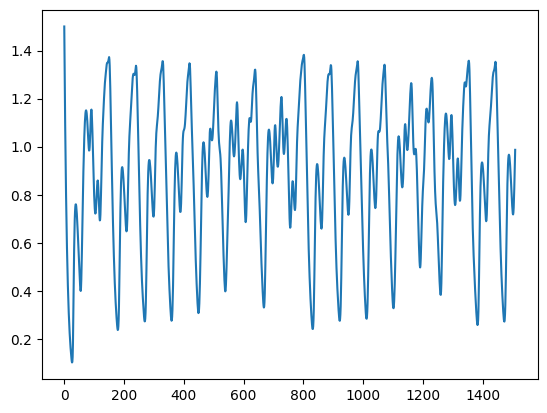

1200
800
200
200


In [244]:

beta = 0.2
gamma = 0.1
n=10
tau =25
#store time series
x= [1.5]
for i in range(0,tau):
    x.append(x[i]*(1-gamma))
for i in range(tau-1,1510):
    x.append(x[i]*(1-gamma)+(beta*x[i-tau])/(1+x[i-tau]**n))

t = [i for i in range(301,1501)]


def mackey_glass_time_series (beta, gamma, n, tau, x0, N_samples) :
    time_series = [x0*(1 - gamma)**t for t in range(tau+1)]
    for t in range(tau, N_samples-1):
        time_series.append(time_series[t]*(1-gamma) + (beta*time_series[t-tau])/(1+time_series[t-tau]**n))
    return np.array(time_series)

x= mackey_glass_time_series(beta, gamma, n, tau, 1.5, 1510)

input=[[x[i-25],x[i-15],x[i-10],x[i-5],x[i]] for i in t]
output = [[x[i+5]] for i in t]




plt.plot(x)
plt.show()

print(len(input))
#shuffle data
order = list(range(1200))
random.shuffle(order)
input = [input[i] for i in order]
output = [output[i] for i in order]

#split data
train_input = input[0:800]
train_output = output[0:800]
val_input = input[800:1000]
val_output = output[800:1000]
test_input = input[1000:]
test_output = output[1000:]

print(len(train_input))
print(len(val_input))
print(len(test_input))


In [245]:


#construct MLP network with regularization

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 9)
        self.fc2 = nn.Linear(9, 9)
        self.fc3 = nn.Linear(9, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    


In [246]:

net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=0.0001)



#train network 
#Set up the training process with a batch backprop algorithm and early stopping to control the duration of learning 

epochs = 40
batch_size = 64
train_loss = []
val_loss = []
test_loss = []
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(net(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    test_loss.append(criterion(net(Variable(torch.FloatTensor(test_input))), Variable(torch.FloatTensor(test_output))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
        print('Early stopping '+str(epoch))
        break




[10] loss: 0.078
[20] loss: 0.028
[30] loss: 0.022
[40] loss: 0.019


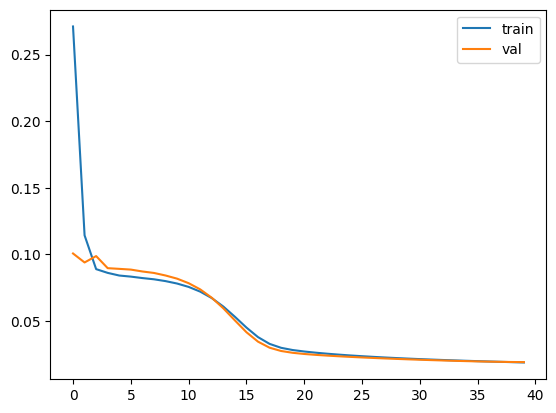

In [247]:

#plot learning curves
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.show()


In [248]:

#test network
test_loss = criterion(net(Variable(torch.FloatTensor(test_input))), Variable(torch.FloatTensor(test_output))).item()
print('Test loss: %.3f' % test_loss)



Test loss: 0.015


In [249]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 3)
        self.fc2 = nn.Linear(3, 2)
        self.fc3 = nn.Linear(2, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

Net3_2 = Net()
criterion = nn.MSELoss()
optimizer3_2 = optim.Adam(Net3_2.parameters(), lr=0.01, weight_decay=0.0001)



#train network 
#Set up the training process with a batch backprop algorithm and early stopping to control the duration of learning 

epochs = 50
batch_size = 64
train_loss = []
val_loss = []
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer3_2.zero_grad()
        outputs = Net3_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3_2.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net3_2(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
        print('Early stopping '+str(epoch))
        break


[10] loss: 0.079
[20] loss: 0.052
[30] loss: 0.028
[40] loss: 0.023
[50] loss: 0.021


In [251]:
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

Net4_4 = Net()
criterion = nn.MSELoss()
optimizer4_4 = optim.Adam(Net4_4.parameters(), lr=0.01, weight_decay=0.0001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer4_4.zero_grad()
        outputs = Net4_4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer4_4.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net3_2(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
      print('Early stopping '+str(epoch) )
      break


[10] loss: 0.084
[20] loss: 0.082
[30] loss: 0.075
[40] loss: 0.050
[50] loss: 0.030


In [253]:
#same for the other networks
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 6)
        self.fc3 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

Net5_6 = Net()
criterion = nn.MSELoss()
optimizer5_6 = optim.Adam(Net5_6.parameters(), lr=0.01, weight_decay=0.0001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer5_6.zero_grad()
        outputs = Net5_6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_6.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_6(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
      print('Early stopping '+str(epoch) )
      break


[10] loss: 0.084
[20] loss: 0.078
[30] loss: 0.045
[40] loss: 0.025
[50] loss: 0.022


In [255]:
#same for the other networks
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 3)
        self.fc2 = nn.Linear(3, 6)
        self.fc3 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

    
Net3_6 = Net()
criterion = nn.MSELoss()
optimizer3_6 = optim.Adam(Net3_6.parameters(), lr=0.01, weight_decay=0.0001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer3_6.zero_grad()
        outputs = Net3_6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer3_6.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net3_6(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    if epoch % 1000 == 999:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
      print('Early stopping '+str(epoch))
      break


In [257]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 2)
        self.fc3 = nn.Linear(2, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_2 = Net()
criterion = nn.MSELoss()
optimizer5_2 = optim.Adam(Net5_2.parameters(), lr=0.01, weight_decay=0.0001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input), batch_size):
        inputs = Variable(torch.FloatTensor(train_input[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output[i:i+batch_size]))
        optimizer5_2.zero_grad()
        outputs = Net5_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_2.step()
        running_loss += loss.item()/len(train_input)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_2(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))
    if epoch > 10 and val_loss[-1] > val_loss[-10]:
      print('Early stopping '+str(epoch) )
      break


[10] loss: 0.054
[20] loss: 0.024
[30] loss: 0.020
[40] loss: 0.018
[50] loss: 0.017


In [260]:

#print val error
val_loss = criterion(Net5_2(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item()
print('Val loss: %.4f' % val_loss)

#print val error
val_loss = criterion(Net4_4(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item()
print('Val loss: %.4f' % val_loss)

#print val error
val_loss = criterion(Net3_6(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item()
print('Val loss: %.4f' % val_loss)

#print val error
val_loss = criterion(Net5_6(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item()
print('Val loss: %.4f' % val_loss)

#print val error
test_loss = criterion(Net3_2(Variable(torch.FloatTensor(val_input))), Variable(torch.FloatTensor(val_output))).item()
print('Val loss: %.4f' % test_loss)


Val loss: 0.0186
Val loss: 0.0301
Val loss: 0.0252
Val loss: 0.0225
Val loss: 0.0222


"\n#test network\ntest_loss = criterion(Net5_2(Variable(torch.FloatTensor(test_input))), Variable(torch.FloatTensor(test_output))).item()\nprint('Test loss: %.3f' % test_loss)\noutput = Net5_2(Variable(torch.FloatTensor(test_input)))\noutput = output.detach().numpy()\nplt.plot(test_output, label='true')\nplt.plot(output, label='prediction')\n\nplt.legend()\nplt.show()"

Test loss: 0.015


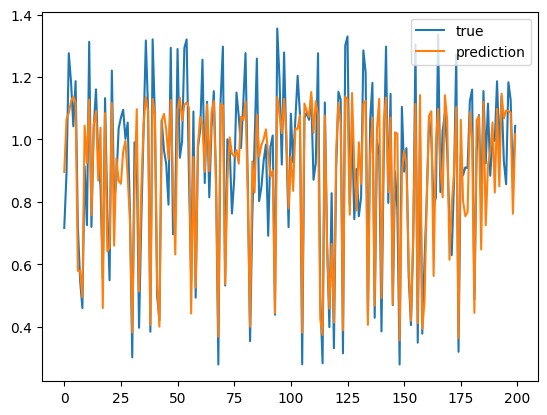

Test loss: 0.025


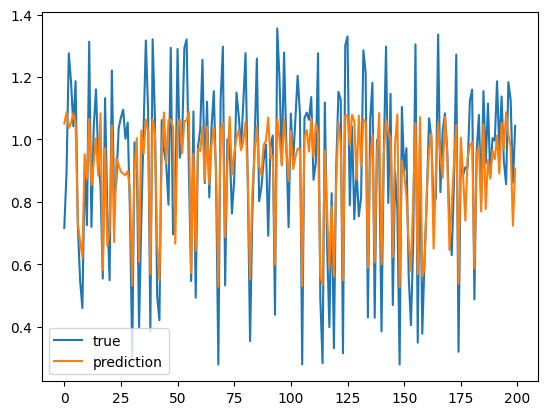

In [264]:


#test network
test_loss = criterion(Net5_2(Variable(torch.FloatTensor(test_input))), Variable(torch.FloatTensor(test_output))).item()
print('Test loss: %.3f' % test_loss)
output = Net5_2(Variable(torch.FloatTensor(test_input)))
output = output.detach().numpy()
plt.plot(test_output, label='true')
plt.plot(output, label='prediction')

plt.legend()
plt.show()

test_loss = criterion(Net4_4(Variable(torch.FloatTensor(test_input))), Variable(torch.FloatTensor(test_output))).item()
print('Test loss: %.3f' % test_loss)
output = Net4_4(Variable(torch.FloatTensor(test_input)))
output = output.detach().numpy()
plt.plot(test_output, label='true')
plt.plot(output, label='prediction')

plt.legend()
plt.show()


In [277]:
#add noise to the data
n=len(x)
noise_1 = np.random.normal(0, 0.05, n)
noise_2 = np.random.normal(0, 0.15, n)

x_1 = x+noise_1
x_2 = x+noise_2

input_1=[[x_1[i-25],x_1[i-15],x_1[i-10],x_1[i-5],x_1[i]] for i in t]
output_1 = [[x_1[i+5]] for i in t]

input_2=[[x_2[i-25],x_2[i-15],x_2[i-10],x_2[i-5],x_2[i]] for i in t]
output_2 = [[x_2[i+5]] for i in t]

#shuffle data
order = list(range(1200))
random.shuffle(order)
input_1 = [input_1[i] for i in order]
output_1 = [output_1[i] for i in order]

order = list(range(1200))
random.shuffle(order)
input_2 = [input_2[i] for i in order]
output_2 = [output_2[i] for i in order]

#split data
train_input_1 = input_1[0:800]
train_output_1 = output_1[0:800]
val_input_1 = input_1[800:1000]
val_output_1 = output_1[800:1000]
test_input_1 = input_1[1000:]
test_output_1 = output_1[1000:]

train_input_2 = input_2[0:800]
train_output_2 = output_2[0:800]
val_input_2 = input_2[800:1000]
val_output_2 = output_2[800:1000]
test_input_2 = input_2[1000:]
test_output_2 = output_2[1000:]



In [278]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_3 = Net()
criterion = nn.MSELoss()
optimizer5_3 = optim.Adam(Net5_3.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_1), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_1[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_1[i:i+batch_size]))
        optimizer5_3.zero_grad()
        outputs = Net5_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_3.step()
        running_loss += loss.item()/len(train_input_1)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_3(Variable(torch.FloatTensor(val_input_1))), Variable(torch.FloatTensor(val_output_1))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.077
[20] loss: 0.056
[30] loss: 0.033
[40] loss: 0.028
[50] loss: 0.026


In [279]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 6)
        self.fc3 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_6 = Net()
criterion = nn.MSELoss()
optimizer5_6 = optim.Adam(Net5_6.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_1), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_1[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_1[i:i+batch_size]))
        optimizer5_6.zero_grad()
        outputs = Net5_6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_6.step()
        running_loss += loss.item()/len(train_input_1)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_6(Variable(torch.FloatTensor(val_input_1))), Variable(torch.FloatTensor(val_output_1))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.076
[20] loss: 0.053
[30] loss: 0.034
[40] loss: 0.029
[50] loss: 0.028


In [280]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 9)
        self.fc3 = nn.Linear(9, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_9 = Net()
criterion = nn.MSELoss()
optimizer5_9 = optim.Adam(Net5_9.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_1), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_1[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_1[i:i+batch_size]))
        optimizer5_9.zero_grad()
        outputs = Net5_9(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_9.step()
        running_loss += loss.item()/len(train_input_1)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_9(Variable(torch.FloatTensor(val_input_1))), Variable(torch.FloatTensor(val_output_1))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.065
[20] loss: 0.033
[30] loss: 0.029
[40] loss: 0.028
[50] loss: 0.027


In [281]:
#test network
test_loss = criterion(Net5_3(Variable(torch.FloatTensor(test_input_1))), Variable(torch.FloatTensor(test_output_1))).item()
print('Test loss: %.3f' % test_loss)

test_loss = criterion(Net5_6(Variable(torch.FloatTensor(test_input_1))), Variable(torch.FloatTensor(test_output_1))).item()
print('Test loss: %.3f' % test_loss)

test_loss = criterion(Net5_9(Variable(torch.FloatTensor(test_input_1))), Variable(torch.FloatTensor(test_output_1))).item()
print('Test loss: %.3f' % test_loss)



Test loss: 0.025
Test loss: 0.026
Test loss: 0.024


In [282]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_3 = Net()
criterion = nn.MSELoss()
optimizer5_3 = optim.Adam(Net5_3.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_2), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_2[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_2[i:i+batch_size]))
        optimizer5_3.zero_grad()
        outputs = Net5_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_3.step()
        running_loss += loss.item()/len(train_input_2)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_3(Variable(torch.FloatTensor(val_input_2))), Variable(torch.FloatTensor(val_output_2))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.099
[20] loss: 0.079
[30] loss: 0.061
[40] loss: 0.055
[50] loss: 0.053


In [283]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 6)
        self.fc3 = nn.Linear(6, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_6 = Net()
criterion = nn.MSELoss()
optimizer5_6 = optim.Adam(Net5_6.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_2), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_2[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_2[i:i+batch_size]))
        optimizer5_6.zero_grad()
        outputs = Net5_6(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_6.step()
        running_loss += loss.item()/len(train_input_2)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_6(Variable(torch.FloatTensor(val_input_2))), Variable(torch.FloatTensor(val_output_2))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.096
[20] loss: 0.066
[30] loss: 0.056
[40] loss: 0.054
[50] loss: 0.053


In [284]:
#same for the other networks

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 5)
        self.fc2 = nn.Linear(5, 9)
        self.fc3 = nn.Linear(9, 1)
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
Net5_9 = Net()
criterion = nn.MSELoss()
optimizer5_9 = optim.Adam(Net5_9.parameters(), lr=0.01, weight_decay=0.001)
epochs = 50
batch_size = 64
train_loss = []
val_loss = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_input_2), batch_size):
        inputs = Variable(torch.FloatTensor(train_input_2[i:i+batch_size]))
        labels = Variable(torch.FloatTensor(train_output_2[i:i+batch_size]))
        optimizer5_9.zero_grad()
        outputs = Net5_9(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer5_9.step()
        running_loss += loss.item()/len(train_input_2)*batch_size
    train_loss.append(running_loss)
    val_loss.append(criterion(Net5_9(Variable(torch.FloatTensor(val_input_2))), Variable(torch.FloatTensor(val_output_2))).item())
    if epoch % 10 == 9:
        print('[%d] loss: %.3f' % (epoch + 1, running_loss))



[10] loss: 0.102
[20] loss: 0.077
[30] loss: 0.055
[40] loss: 0.053
[50] loss: 0.053


In [285]:
#test network
test_loss = criterion(Net5_3(Variable(torch.FloatTensor(test_input_2))), Variable(torch.FloatTensor(test_output_2))).item()
print('Test loss: %.3f' % test_loss)

test_loss = criterion(Net5_6(Variable(torch.FloatTensor(test_input_2))), Variable(torch.FloatTensor(test_output_2))).item()
print('Test loss: %.3f' % test_loss)

test_loss = criterion(Net5_9(Variable(torch.FloatTensor(test_input_2))), Variable(torch.FloatTensor(test_output_2))).item()
print('Test loss: %.3f' % test_loss)

Test loss: 0.050
Test loss: 0.051
Test loss: 0.050
